# Preparing working environment

In [1]:
# Importing librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allowing modules autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# Importing DataSets
df_countries = pd.read_csv("Edstats_csv/EdStatsCountry.csv", sep = ',')
df_countries.name = "Country"

df_countries_series = pd.read_csv("Edstats_csv/EdStatsCountry-Series.csv", sep = ',')
df_countries_series.name = "Country-Series"

df_data = pd.read_csv("Edstats_csv/EdStatsData.csv", sep = ',')
df_data.name = "Data"

df_footnote = pd.read_csv("Edstats_csv/EdStatsFootNote.csv", sep = ',')
df_footnote.name = "FootNote"

df_series = pd.read_csv("Edstats_csv/EdStatsSeries.csv", sep = ',')
df_series.name = "Series"

data_list = [df_countries, df_countries_series, df_data, df_footnote, df_series]

datasets = []
for df in data_list:
    datasets.append(df.name)

In [3]:
# Headers of datasets
for df in data_list:
    print(df.name)
    print(df.columns)
    print("\n")

Country
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')


Country-Series
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')


D

At first sight, the core datasets for our analysis seems to be "Data" and "Series":
"Data" gives the indicator value for a given country and a given year, and may be some projections for the next decades.
"Series" will also be essential for the analysis to understand the various indicator used in the World Bank database.

As country names are already given in "Data", no join will be required with "Country". In a later stage, some of the dataset could be useful, for instance, "currenty unit" might be required to compare countries on an economic indicator if not converted into a single currency, or to determine indicators at a higher level (using the "Region" inforamtion).

Finally, datasets "Country-Series" and "Footnote" require some deeper investigation on their content, as the headers alone do not give many information on the date, to determine whether those datasets are relevant for our analysis.

Each dataset also contain some unnamed columns, that must be inspected not to overlook potentially interresting data.

In [4]:
# Checking unnamed columns
print(df_countries['Unnamed: 31'].unique())
print(df_countries_series['Unnamed: 3'].unique())
print(df_data['Unnamed: 69'].unique())
print(df_footnote['Unnamed: 4'].unique())
print(df_series['Unnamed: 20'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]


In [5]:
# Droping unnamed empty columns
df_countries.drop(columns=['Unnamed: 31'], inplace = True)
df_countries_series.drop(columns=['Unnamed: 3'], inplace = True)
df_data.drop(columns=['Unnamed: 69'], inplace = True)
df_footnote.drop(columns=['Unnamed: 4'], inplace = True)
df_series.drop(columns=['Unnamed: 20'], inplace = True)

# Sizes of datasets

The dataset Country contains 7471 elements, in 241 rows and 31 columns.
The dataset Country-Series contains 1839 elements, in 613 rows and 3 columns.
The dataset Data contains 61198170 elements, in 886930 rows and 69 columns.
The dataset FootNote contains 2574552 elements, in 643638 rows and 4 columns.
The dataset Series contains 73300 elements, in 3665 rows and 20 columns.


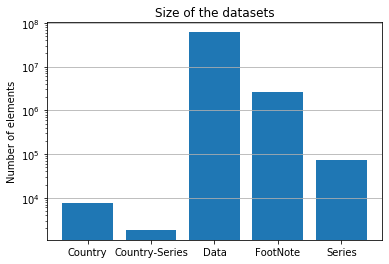

In [6]:
# Quick description of each dataset
from P2_preprocession_scripts import calc_sizes
calc_sizes(data_list)

Reminder : number of elements does not exclude missing data

2113 cells in the dataset Country are filled with null elements, representing 28.299999999999997% of the dataset.
0 cells in the dataset Country-Series are filled with null elements, representing 0.0% of the dataset.
52568249 cells in the dataset Data are filled with null elements, representing 85.9% of the dataset.
0 cells in the dataset FootNote are filled with null elements, representing 0.0% of the dataset.
51538 cells in the dataset Series are filled with null elements, representing 70.3% of the dataset.


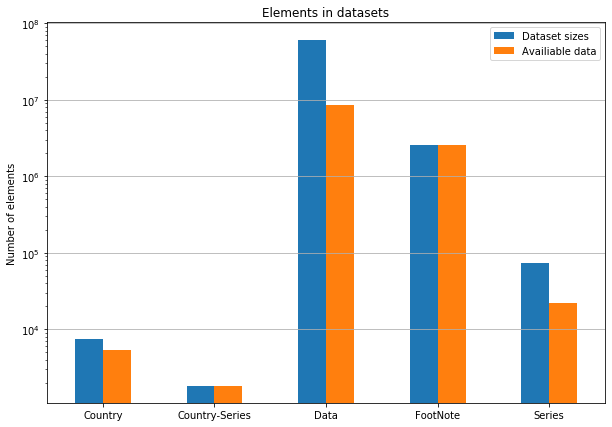

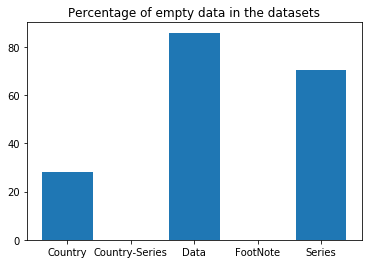

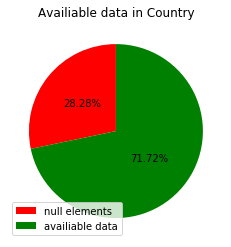

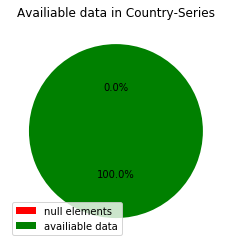

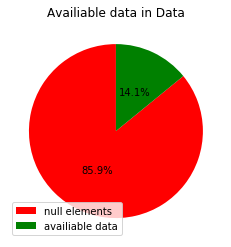

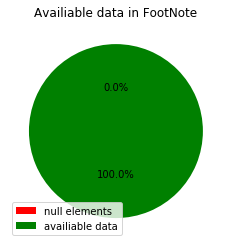

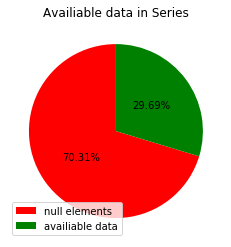

In [7]:
# Missing Data
from P2_preprocession_scripts import calc_missing2
calc_missing2(data_list)

The main dataset (Data) contains a lot of empty cells. Does not necessarely indicates a lack of data, but could put into evidence that each country might use different indicators for evaluating their educationnal system, or that each measurement is not conducted every year. 

For instance, the dataset provides HH.DHS.OOST.X and HH.MICS.OOST.X for measuring out-of-school children in primary class. In 2014, the data provides both measures for Bangladesh, whereas we have only the DHS Indicator for Cambodia and Senegal, and only the MICS Indicator for Kyrghizistan or Vietnam. Considering Bangladesh again, last measurement of those indicators were in 2014 and 2006, respectively.

Thus, an important work will be required to be able to compare countries using a different indicator for a same criteria or to compare their tendancy on those criteria.

In [8]:
# Checking duplicates
for df in data_list:
    rows_initial = df.shape[0]
    rows_cleared = df.drop_duplicates().shape[0]
    count_duplicates = rows_initial - rows_cleared
    
    print("The dataset {} contains {} duplicates.".format(df.name, count_duplicates))

The dataset Country contains 0 duplicates.
The dataset Country-Series contains 0 duplicates.
The dataset Data contains 0 duplicates.
The dataset FootNote contains 0 duplicates.
The dataset Series contains 0 duplicates.


Data seems not to have duplicates when taking every columns into account. Further checking to process after removing unnecessary columns.

# Describing CountrySeries dataset

In [9]:
# First look on the dataset
df_countries_series.head(15)

CountryCode         SeriesCode  \
0          ABW        SP.POP.TOTL   
1          ABW        SP.POP.GROW   
2          AFG        SP.POP.GROW   
3          AFG  NY.GDP.PCAP.PP.CD   
4          AFG        SP.POP.TOTL   
5          AFG  NY.GDP.MKTP.PP.KD   
6          AFG  NY.GNP.MKTP.PP.CD   
7          AFG  NY.GDP.MKTP.PP.CD   
8          AFG  NY.GDP.PCAP.PP.KD   
9          AFG  NY.GNP.PCAP.PP.CD   
10         AGO        SP.POP.TOTL   
11         AGO        SP.POP.GROW   
12         ALB        SP.POP.GROW   
13         ALB        SP.POP.TOTL   
14         AND        SP.POP.TOTL   

                                          DESCRIPTION  
0   Data sources : United Nations World Population...  
1   Data sources: United Nations World Population ...  
2   Data sources: United Nations World Population ...  
3                  Estimates are based on regression.  
4   Data sources : United Nations World Population...  
5                  Estimates are based on regression.  
6                  Estimates are based on regression.  
7                  Estimates are based on regression.  
8                  Estimates are based on regression.  
9                  Estimates are based on regression.  
10  Data sources : United Nations World Population...  
11  Data sources: United Nations World Population ...  
12  Data sources: United Nations World Population ...  
13   Data sources : Institute of Statistics, Eurostat  
14  Data sources : United Nations World Population...

In [10]:
# Showing some entries with common keywords
from sklearn.utils import shuffle
df_shuffled = df_countries_series.copy()
df_shuffled = shuffle(df_shuffled)

In [11]:
# Number of unique values in description
len(df_shuffled["DESCRIPTION"].unique())

97

In [12]:
# Occurence of unique values
df_shuffled["DESCRIPTION"].value_counts().head(20)

Data sources : United Nations World Population Prospects                                                                 154
Data sources: United Nations World Population Prospects                                                                  137
Estimates are based on regression.                                                                                        84
Data sources : Eurostat                                                                                                   54
Derived using ratio of age group from WPP and World Bank population.                                                      24
Data are for areas under the effective control of the Government of the Republic of Cyprus.                                6
Includes Former Spanish Sahara.                                                                                            6
Covers mainland Tanzania only.                                                                                             6


In [13]:
# Looking for main keywords in description
from P2_preprocession_scripts import most_common_words        
most_common_words(df_countries_series['DESCRIPTION'].values)

('Data', 428)
('World', 345)
('Population', 322)
('United', 320)
('Nations', 320)
('Prospects', 306)
(':', 252)
('sources', 251)
('sources:', 171)
('of', 103)
('are', 96)
('on', 91)
('Estimates', 86)
('based', 86)
('regression.', 84)
('and', 77)
('Eurostat', 57)
('Statistics', 43)
('the', 36)
('Including', 30)


## Looking for examples of entries containing common strings to understand their utility

In [14]:
# Descriptions containing "United Nations"
df_shuffled[df_shuffled["DESCRIPTION"].str.contains("United Nations")].head(10)

CountryCode   SeriesCode  \
258         JOR  SP.POP.TOTL   
554         TUV  SP.POP.GROW   
146         EGY  SP.POP.TOTL   
51          BGD  SP.POP.TOTL   
570         UKR  SP.POP.TOTL   
379         MUS  SP.POP.GROW   
280         LBN  SP.POP.GROW   
289         LBR  SP.POP.GROW   
350         MEX  SP.POP.GROW   
71          BRB  SP.POP.TOTL   

                                           DESCRIPTION  
258  Data sources : United Nations World Population...  
554  Data sources: United Nations World Population ...  
146  Data sources : United Nations World Population...  
51   Data sources : United Nations World Population...  
570  Data sources : State Statistics Committee of U...  
379  Data sources: Central Statistics Office, Unite...  
280  Data sources : United Nations World Population...  
289  Data sources: United Nations World Population ...  
350  Data sources: United Nations World Population ...  
71   Data sources : United Nations World Population...

In [15]:
# Descriptions containing "Eurostat"
df_shuffled[df_shuffled["DESCRIPTION"].str.contains("Eurostat")].head(10)

CountryCode   SeriesCode              DESCRIPTION
82          CHE  SP.POP.GROW  Data sources : Eurostat
53          BGR  SP.POP.GROW  Data sources : Eurostat
236         HUN  SP.POP.GROW  Data sources : Eurostat
250         ISL  SP.POP.TOTL  Data sources : Eurostat
503         SVK  SP.POP.GROW  Data sources : Eurostat
163         FIN  SP.POP.TOTL  Data sources : Eurostat
405         NOR  SP.POP.TOTL  Data sources : Eurostat
451         ROU  SP.POP.TOTL  Data sources : Eurostat
308         LUX  SP.POP.GROW   Data sources: Eurostat
156         ESP  SP.POP.TOTL  Data sources : Eurostat

In [16]:
from P2_preprocession_scripts import check_regex
check_regex(r"[eE]stim", df_shuffled['DESCRIPTION'])

DESCRIPTION
477                 Estimates are based on regression.
283                 Estimates are based on regression.
227                 Estimates are based on regression.
516                 Estimates are based on regression.
533                 Estimates are based on regression.
151                 Estimates are based on regression.
440  Data sources : World Bank estimates based on d...
431                 Estimates are based on regression.
598                 Estimates are based on regression.
222                 Estimates are based on regression.

In [17]:
# Descriptions containing variations of "include" and "exclude"
check_regex(r"([Ii][n]|[Ee][x])clu[ds]", df_shuffled['DESCRIPTION'])

DESCRIPTION
180  Data sources : GeoStats. GeoStats. Adjusted to...
127                         Including Northern-Cyprus.
390                       Including Sabah and Sarawak.
440  Data sources : World Bank estimates based on d...
558                                Including Zanzibar.
443  Data sources: World Bank estimates based on da...
382                 Excluding Agalega and St. Brandon.
124                         Including Northern-Cyprus.
441                          Excluding East Jerusalem.
328  Data sources : National Bureau of Statistics. ...

The dataset essentially gives a few details on how each Serie is determined in each country, by giving the source (UN World population prospect or Eurostat being the most common sources), the excluded or included territories in the calculus (ex : ) or  the method of estimation.

Could be usefull to build reliabily indicators, but does not look very promising for the expansion project.

# Describing Footnote dataset

In [18]:
# First look on the dataset
df_shuffled = shuffle(df_footnote.copy())
df_shuffled.head(20)

CountryCode               SeriesCode    Year  \
433730         MWI        SE.SEC.TCAQ.MA.ZS  YR2013   
405197         MKD        SE.ENR.PRSC.FM.ZS  YR1995   
617615         UZB        SE.SEC.TCAQ.FE.ZS  YR2011   
152847         EAS              SE.SEC.TCHR  YR1998   
331574         LCN  UIS.AIR.2.GPV.GLAST.GPI  YR2001   
91942          CHL     SE.TER.GRAD.HU.FE.ZS  YR2004   
280294         JOR        SP.POP.AG11.FE.UN  YR1980   
476900         PAK            UIS.SLE.1.GPI  YR2009   
258800         IND           SE.PRM.ENRL.FE  YR1977   
22661          AUS        SP.POP.TOTL.MA.ZS  YR1980   
242605         HPC         UIS.REPP.2.GPV.M  YR2002   
46418          BFA        SE.ENR.TERT.FM.ZS  YR1972   
177480         ESP        SP.POP.TOTL.FE.IN  YR2002   
40188          BEL           SE.TER.ENRL.FE  YR1978   
91047          CHL           SE.SEC.ENRL.GC  YR2006   
349847         LKA             UIS.E.1.G4.F  YR2014   
61865          BLR           SE.PRM.PRIV.ZS  YR1992   
636073         YEM           SE.PRM.DROP.ZS  YR2002   
507518         ROU        SE.TER.GRAD.HL.ZS  YR1999   
237119         HKG               UIS.OFST.2  YR2010   

                                              DESCRIPTION  
433730                                     UIS Estimation  
405197                                       Country Data  
617615                                       Country data  
152847     UNESCO Institute for Statistics (UIS) estimate  
331574     UNESCO Institute for Statistics (UIS) estimate  
91942                                           Estimated  
280294  WB estimate based on the UNSD WPP08 revision f...  
476900                                  National Estimate  
258800                                       Country Data  
22661   Including Christmas Island, Cocos (Keeling) Is...  
242605     UNESCO Institute for Statistics (UIS) estimate  
46418                                        Country Data  
177480       Including Canary Islands, Ceuta and Melilla.  
40188                                        Country Data  
91047                                 Country estimation.  
349847     UNESCO Institute for Statistics (UIS) estimate  
61865                                        Country Data  
636073                                       Country data  
507518                                          Estimated  
237119     UNESCO Institute for Statistics (UIS) estimate

Seems very similar to the CountriesSeries dataset, with the exception of column "Year".
This dataset must thus gives further information on a serie for a given country and a given year.

In [19]:
# Looking for most frequent descriptions
df_shuffled['DESCRIPTION'].value_counts()

Country Data                                                                                              191188
UNESCO Institute for Statistics (UIS) estimate                                                            171527
Estimated                                                                                                 117155
UIS Estimation                                                                                             31395
Country estimation.                                                                                        26308
National Estimate                                                                                          23570
Country data                                                                                               16353
National Estimation                                                                                        12001
UNSD WPP08 revision file 2A and 3A.                                                             

In [20]:
len(df_shuffled['DESCRIPTION'].value_counts())

9102

In [21]:
# Most common words in descriptions
most_common_words(df_shuffled['DESCRIPTION'])

('Country', 234641)
('Data', 193530)
('for', 177734)
('estimate', 173681)
('Statistics', 171529)
('UNESCO', 171527)
('Institute', 171527)
('(UIS)', 171527)
('Estimated', 117207)
('Estimation', 43405)
('National', 36211)
('UIS', 34545)
('estimation.', 29093)
('Estimate', 23584)
('data', 19840)
('and', 16748)
('is', 13432)
('the', 13047)
('bound', 12561)
('Reference', 10493)


In [22]:
# Looking for examples matching "estimate" or "Estimation"
check_regex(r".[eE]stim.", df_shuffled['DESCRIPTION'])

DESCRIPTION
433730                                     UIS Estimation
152847     UNESCO Institute for Statistics (UIS) estimate
331574     UNESCO Institute for Statistics (UIS) estimate
280294  WB estimate based on the UNSD WPP08 revision f...
476900                                  National Estimate
242605     UNESCO Institute for Statistics (UIS) estimate
91047                                 Country estimation.
349847     UNESCO Institute for Statistics (UIS) estimate
237119     UNESCO Institute for Statistics (UIS) estimate
356338     UNESCO Institute for Statistics (UIS) estimate

In [23]:
# Looking for examples matching "bound" or "Bound"
check_regex(r"[Bb]ound", df_shuffled['DESCRIPTION'])

DESCRIPTION
511100    Uncertainty bound is 168.9 - 200
404949    Uncertainty bound is 53.1 - 57.3
143575    Uncertainty bound is 34.4 - 40.7
456521     Uncertainty bound is 9.9 - 10.6
461493          Plausible bound is 0.2-0.3
95104      Uncertainty bound is 8.7 - 11.4
429461          Plausible bound is 0.7-1.1
496008    Uncertainty bound is 47.2 - 57.1
434982  Uncertainty bound is 230.6 - 259.9
524499      Uncertainty bound is 8.8 - 9.5

In [24]:
# Looking for examples matching "Break" or "break"
check_regex(r"[Bb]reak", df_shuffled['DESCRIPTION'])

DESCRIPTION
247672                                   Break in series.
270736  Break in comparability, from this year on data...
87567                                    Break in series.
248879  Not calculated because there is a break in ser...
259835                      Preliminary. Break in series.
238967  Break in series. The figures from 1961 to 1995...
38404                                    Break in series.
87568                                    Break in series.
409782                                   Break in series.
567553            Break in series. Rebased on the census.

As for the Country_Series dataset, those data could be useful for building confidence indicators on the analysed data, particularly thanks to the given uncertainty bounds, or explanation for sudden changes (break in series). 

# Cleaning the "Data" dataset

In [25]:
# Columns of the dataset 
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

The main dataset contains a huge amount of data (in the order to 10^8) with only 14% of non-empty cells. To ease the analysis, the columns or rows containing no data or very few shall be removed. 

## Entries without data in year columns

In [26]:
# Counting rows with no data in year columns
df_data['nb_measure'] = df_data.count(axis = 'columns')-4
df_data

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
5        Arab World          ARB   
6        Arab World          ARB   
7        Arab World          ARB   
8        Arab World          ARB   
9        Arab World          ARB   
10       Arab World          ARB   
11       Arab World          ARB   
12       Arab World          ARB   
13       Arab World          ARB   
14       Arab World          ARB   
15       Arab World          ARB   
16       Arab World          ARB   
17       Arab World          ARB   
18       Arab World          ARB   
19       Arab World          ARB   
20       Arab World          ARB   
21       Arab World          ARB   
22       Arab World          ARB   
23       Arab World          ARB   
24       Arab World          ARB   
25       Arab World          ARB   
26       Arab World          ARB   
27       Arab World          ARB   
28       Arab World          ARB   
29       Arab World          ARB   
...             ...          ...   
886900     Zimbabwe          ZWE   
886901     Zimbabwe          ZWE   
886902     Zimbabwe          ZWE   
886903     Zimbabwe          ZWE   
886904     Zimbabwe          ZWE   
886905     Zimbabwe          ZWE   
886906     Zimbabwe          ZWE   
886907     Zimbabwe          ZWE   
886908     Zimbabwe          ZWE   
886909     Zimbabwe          ZWE   
886910     Zimbabwe          ZWE   
886911     Zimbabwe          ZWE   
886912     Zimbabwe          ZWE   
886913     Zimbabwe          ZWE   
886914     Zimbabwe          ZWE   
886915     Zimbabwe          ZWE   
886916     Zimbabwe          ZWE   
886917     Zimbabwe          ZWE   
886918     Zimbabwe          ZWE   
886919     Zimbabwe          ZWE   
886920     Zimbabwe          ZWE   
886921     Zimbabwe          ZWE   
886922     Zimbabwe          ZWE   
886923     Zimbabwe          ZWE   
886924     Zimbabwe          ZWE   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
5        Adjusted net enrolment rate, primary, female (%)   
6       Adjusted net enrolment rate, primary, gender p...   
7          Adjusted net enrolment rate, primary, male (%)   
8       Adjusted net enrolment rate, upper secondary, ...   
9       Adjusted net enrolment rate, upper secondary, ...   
10      Adjusted net enrolment rate, upper secondary, ...   
11      Adjusted net enrolment rate, upper secondary, ...   
12      Adjusted net intake rate to Grade 1 of primary...   
13      Adjusted net intake rate to Grade 1 of primary...   
14      Adjusted net intake rate to Grade 1 of primary...   
15      Adjusted net intake rate to Grade 1 of primary...   
16       Adult illiterate population, 15+ years, % female   
17      Adult illiterate population, 15+ years, both s...   
18      Adult illiterate population, 15+ years, female...   
19      Adult illiterate population, 15+ years, male (...   
20      Adult literacy rate, population 15+ years, bot...   
21      Adult literacy rate, population 15+ years, fem...   
22      Adult literacy rate, population 15+ years, gen...   
23      Adult literacy rate, population 15+ years, mal...   
24      Africa Dataset: Average number of grades per m...   
25      Africa Dataset: Average number of pupils per m...   
26      Africa Dataset: Average number of pupils per m...   
27      Africa Dataset: Average number of pupils per m...   
28   

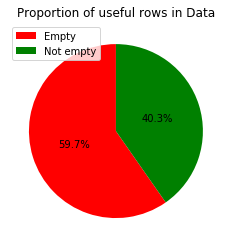

In [27]:
# Number of rows with no data in the Year columns
empty_rows = df_data[df_data['nb_measure']==0].shape[0]
non_empty_rows = df_data.shape[0] - empty_rows

# Visual representation
plt.pie([empty_rows, non_empty_rows], 
        labels = ['Empty', 'Not empty'], colors = ['red','green'], labeldistance = None,
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.5,
        startangle = 90)
plt.title("Proportion of useful rows in Data")
plt.legend(loc = 'best')
plt.show()

In [28]:
# Determining wether each indicator is given for every country
print("Total number of indicators = ", df_series.shape[0])
print("Mean number of indicator per country = ", df_data['Country Name'].value_counts().mean())
print("Standard deviation of indicators per country = ", df_data['Country Name'].value_counts().std())
print("\n")

# and wether each country is given for every indicator
print("Total number of countries = ", df_countries.shape[0])
print("Mean number of countries per indicator = ", df_data['Indicator Code'].value_counts().mean())
print("Standard deviation of countries per indicator = ", df_data['Indicator Code'].value_counts().std())

Total number of indicators =  3665
Mean number of indicator per country =  3665.0
Standard deviation of indicators per country =  0.0


Total number of countries =  241
Mean number of countries per indicator =  242.0
Standard deviation of countries per indicator =  0.0


In the dataset, each row gives the values of a given indicator for a given country. However, each indicator is not necesseraly used for each country, resulting in a majority of empty rows, that shall therefore be drop from our analysis.

Surprisingly, it appears that at least one country given in the "Data" dataset is missing in the "Country" dataset.

Interestingly, the data is given on more than the 197 countries recognized by the UN. Those "extras" shall be investigated to determine if they are relevant in our analysis.

In [29]:
# Removing empty rows
df_data_cleaned = df_data[df_data['nb_measure']>0]
df_data_cleaned.head(20)

Country Name Country Code  \
4     Arab World          ARB   
5     Arab World          ARB   
6     Arab World          ARB   
7     Arab World          ARB   
12    Arab World          ARB   
13    Arab World          ARB   
14    Arab World          ARB   
15    Arab World          ARB   
16    Arab World          ARB   
17    Arab World          ARB   
18    Arab World          ARB   
19    Arab World          ARB   
20    Arab World          ARB   
21    Arab World          ARB   
22    Arab World          ARB   
23    Arab World          ARB   
96    Arab World          ARB   
98    Arab World          ARB   
101   Arab World          ARB   
520   Arab World          ARB   

                                        Indicator Name  \
4    Adjusted net enrolment rate, primary, both sex...   
5     Adjusted net enrolment rate, primary, female (%)   
6    Adjusted net enrolment rate, primary, gender p...   
7       Adjusted net enrolment rate, primary, male (%)   
12   Adjusted net intake rate to Grade 1 of primary...   
13   Adjusted net intake rate to Grade 1 of primary...   
14   Adjusted net intake rate to Grade 1 of primary...   
15   Adjusted net intake rate to Grade 1 of primary...   
16    Adult illiterate population, 15+ years, % female   
17   Adult illiterate population, 15+ years, both s...   
18   Adult illiterate population, 15+ years, female...   
19   Adult illiterate population, 15+ years, male (...   
20   Adult literacy rate, population 15+ years, bot...   
21   Adult literacy rate, population 15+ years, fem...   
22   Adult literacy rate, population 15+ years, gen...   
23   Adult literacy rate, population 15+ years, mal...   
96   Africa Dataset: Percentage of primary schools ...   
98   Africa Dataset: Percentage of primary schools ...   
101  Africa Dataset: Percentage of primary schools ...   
520  Cumulative drop-out rate to the last grade of ...   

                  Indicator Code       1970       1971       1972       1973  \
4                    SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
5                 SE.PRM.TENR.FE  43.351101  43.318150  44.640701  45.845718   
6                 UIS.NERA.1.GPI   0.658570   0.656400   0.663290   0.672040   
7                 SE.PRM.TENR.MA  65.826233  65.993584  67.301857  68.219078   
12                    UIS.NIRA.1  52.448921  52.489750  52.635593  53.327000   
13                  UIS.NIRA.1.F  44.342487  44.255711  44.446136  45.270443   
14                UIS.NIRA.1.GPI   0.736340   0.732880   0.734730   0.741420   
15                  UIS.NIRA.1.M  60.220436  60.386391  60.493145  61.059116   
16               UIS.LPP.AG15T99        NaN        NaN        NaN        NaN   
17                UIS.LP.AG15T99        NaN        NaN        NaN        NaN   
18              UIS.LP.AG15T99.F        NaN        NaN        NaN        NaN   
19              UIS.LP.AG15T99.M        NaN        NaN        NaN        NaN   
20                SE.ADT.LITR.ZS        NaN        NaN        NaN        NaN   
21             SE.ADT.LITR.FE.ZS        NaN        NaN        NaN        NaN   
22            UIS.LR.AG15T99.GPI        NaN        NaN        NaN        NaN   
23             SE.ADT.LITR.MA.ZS        NaN        NaN        NaN        NaN   
96   UIS.AFR.SCHBSP.1.PU.WNITOIL        NaN        NaN        NaN        NaN   
98     UIS.AFR.SCHBSP.1.PU.WTOIL        NaN        NaN        NaN        NaN   
101   UIS.AFR.SCHBSP.1.PU.WOTOIL        NaN        NaN        NaN        NaN   
520               SE.PRM.DROP.ZS  38.581570  39.246620  40.088161  40.359428   

          1974       1975  ...  2060  2065  2070  2075  2080  2085  2090  \
4    57.991138  59.365540  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5    46.449501  48.363892  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6     0.672610   0.691760  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7    69.059013  69.914551  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12   54.184654  54.865627  ...

## Look on the countries list

In [30]:
# Looking for missing country code in Country dataset
missing_codes = []
for code in df_data["Country Code"].unique():
    if code not in df_countries['Country Code'].unique():
        missing_codes.append(code)
print(missing_codes)

['VGB']


In [31]:
# Looking for "extra" countries
df_countries.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [32]:
# Countries per world region
df_countries[['Short Name','Region']].fillna("NA").groupby(['Region']).count()

Short Name
Region                                
East Asia & Pacific                 36
Europe & Central Asia               57
Latin America & Caribbean           41
Middle East & North Africa          21
NA                                  27
North America                        3
South Asia                           8
Sub-Saharan Africa                  48

In [33]:
# Blank Region field
df_countries[df_countries['Region'].isna()][['Short Name', "Country Code"]]

Short Name Country Code
5                                        Arab World          ARB
57            East Asia & Pacific (developing only)          EAP
58          East Asia & Pacific (all income levels)          EAS
59          Europe & Central Asia (developing only)          ECA
60        Europe & Central Asia (all income levels)          ECS
63                                        Euro area          EMU
68                                   European Union          EUU
78                                        Gibraltar          GIB
89                                      High income          HIC
92           Heavily indebted poor countries (HIPC)          HPC
116     Latin America & Caribbean (developing only)          LAC
122   Latin America & Caribbean (all income levels)          LCN
123    Least developed countries: UN classification          LDC
124                                      Low income          LIC
127                             Lower middle income          LMC
128                             Low & middle income          LMY
140  Middle East & North Africa (all income levels)          MEA
143                                   Middle income          MIC
148    Middle East & North Africa (developing only)          MNA
157                                   North America          NAC
166                                           Nauru          NRU
168                                    OECD members          OED
187                                      South Asia          SAS
198            Sub-Saharan Africa (developing only)          SSA
200          Sub-Saharan Africa (all income levels)          SSF
225                             Upper middle income          UMC
234                                           World          WLD

The data includes indicator values of group of countries. The concerned rows in the main dataset should defitively be kept for the analysis in order to have a first opinion on what world could be of an interest for the company. Some information are missing, such as the region of Gibraltar and Nauru (which should be Europe and East Asia & Pacific, respectively)

In [34]:
# Countries in the "Latin America & Caribbean" region
df_countries[df_countries['Region'] == "Latin America & Caribbean"][['Short Name', "Country Code"]]

Short Name Country Code
0                             Aruba          ABW
7                         Argentina          ARG
10              Antigua and Barbuda          ATG
21                      The Bahamas          BHS
24                           Belize          BLZ
26                          Bolivia          BOL
27                           Brazil          BRA
28                         Barbados          BRB
36                            Chile          CHL
42                         Colombia          COL
45                       Costa Rica          CRI
46                             Cuba          CUB
47                          Curaçao          CUW
48                   Cayman Islands          CYM
53                         Dominica          DMA
55               Dominican Republic          DOM
61                          Ecuador          ECU
84                          Grenada          GRD
86                        Guatemala          GTM
88                           Guyana          GUY
91                         Honduras          HND
94                            Haiti          HTI
105                         Jamaica          JAM
113             St. Kitts and Nevis          KNA
121                       St. Lucia          LCA
134        St. Martin (French part)          MAF
141                          Mexico          MEX
162                       Nicaragua          NIC
171                          Panama          PAN
172                            Peru          PER
177                     Puerto Rico          PRI
180                        Paraguay          PRY
194                     El Salvador          SLV
202                        Suriname          SUR
207       Sint Maarten (Dutch part)          SXM
210        Turks and Caicos Islands          TCA
218             Trinidad and Tobago          TTO
226                         Uruguay          URY
229  St. Vincent and the Grenadines          VCT
230                       Venezuela          VEN
231                  Virgin Islands          VIR

The Latin America & Caribbean Region reveals that some entries in the "Country" dataset are not countries, properly speaking, but special geographic regions. For instance we can find some overseas territories (such as Saint-Martin, Curaçao or the US Virgin Islands), but the list is not exhaustive (we would expect to see French Guiana for example).

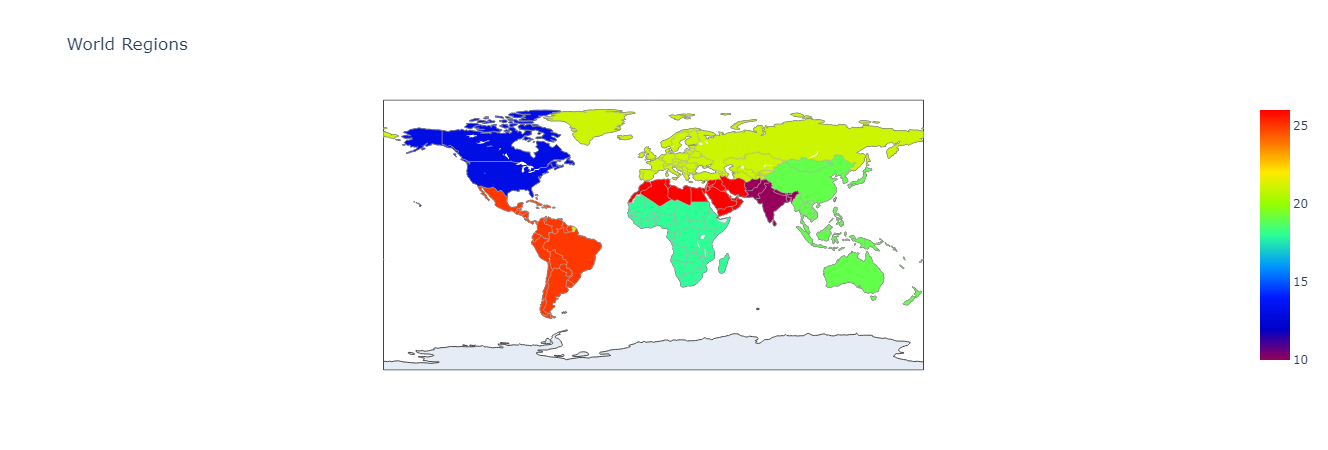

In [35]:
# Map of World Regions
from P2_preprocession_scripts import region_mapping
region_mapping(df_countries)

## Resizing time period

Let's now focus on the columns : our analysis does not necessarily require to look data before year 2000, and there might be very few data for future years.

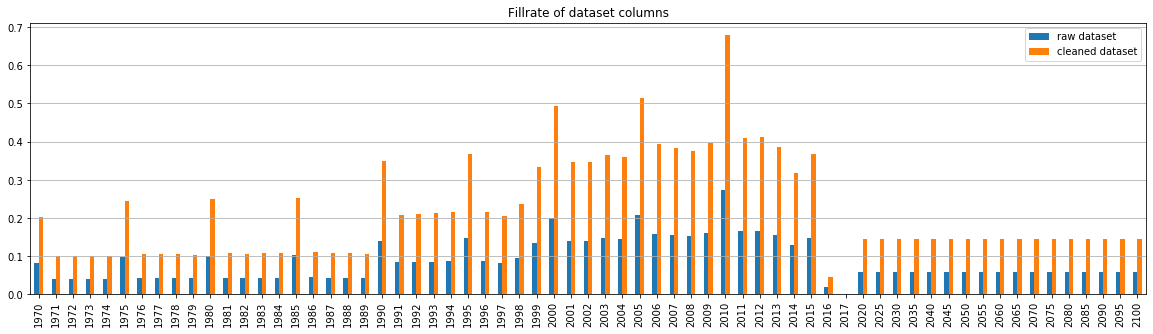

In [36]:
# Comparing column fill rates before and after row cleaning
summarise_cleaning = pd.DataFrame(df_data.iloc[0:,4:-1].count()/df_data.iloc[0:,4:-1].shape[0], columns = ['raw dataset'])
summarise_cleaning['cleaned dataset'] = df_data_cleaned.iloc[0:,4:-1].count()/df_data_cleaned.iloc[0:,4:-1].shape[0]

plot_cleaning = summarise_cleaning.plot.bar(figsize = (20,5), title = "Fillrate of dataset columns")
plot_cleaning.yaxis.grid(True)

Even after deleting rows with no data, columns fillrate rarely exceed 40%, confirming that each indicator is not availiable for every year in the dataset. Thus, we cannot reasonably rely on a single year to build further analysis.



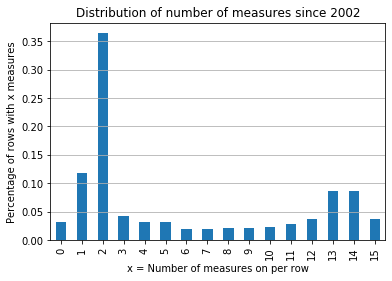

In [37]:
# Number of measures made since a specified year
from P2_preprocession_scripts import count_measures
count_measures(df_data_cleaned, 2002)

The scope of our study does not require data on 50 years, but should focus on recent measures. However, we must keep enough years to have a relevant amount of data to explore. A scope of 15 years of data gives a good balance, with less than 5% of rows having no data on this scope.

In [38]:
# Dropping years before 2002
from P2_preprocession_scripts import drop_years
df_data_cleaned = drop_years(df_data_cleaned, 1970, 2001)

## Last measure

In [39]:
# Adding columns to show the value and year of the last measure.
from P2_preprocession_scripts import last_measure
df_data_cleaned = last_measure(df_data_cleaned)
df_data_cleaned

Country Name Country Code  \
4        Arab World          ARB   
5        Arab World          ARB   
6        Arab World          ARB   
7        Arab World          ARB   
12       Arab World          ARB   
13       Arab World          ARB   
14       Arab World          ARB   
15       Arab World          ARB   
16       Arab World          ARB   
17       Arab World          ARB   
18       Arab World          ARB   
19       Arab World          ARB   
20       Arab World          ARB   
21       Arab World          ARB   
22       Arab World          ARB   
23       Arab World          ARB   
96       Arab World          ARB   
98       Arab World          ARB   
101      Arab World          ARB   
520      Arab World          ARB   
521      Arab World          ARB   
522      Arab World          ARB   
703      Arab World          ARB   
704      Arab World          ARB   
705      Arab World          ARB   
706      Arab World          ARB   
707      Arab World          ARB   
708      Arab World          ARB   
709      Arab World          ARB   
1123     Arab World          ARB   
...             ...          ...   
886900     Zimbabwe          ZWE   
886901     Zimbabwe          ZWE   
886902     Zimbabwe          ZWE   
886903     Zimbabwe          ZWE   
886904     Zimbabwe          ZWE   
886905     Zimbabwe          ZWE   
886906     Zimbabwe          ZWE   
886907     Zimbabwe          ZWE   
886908     Zimbabwe          ZWE   
886909     Zimbabwe          ZWE   
886910     Zimbabwe          ZWE   
886911     Zimbabwe          ZWE   
886912     Zimbabwe          ZWE   
886913     Zimbabwe          ZWE   
886914     Zimbabwe          ZWE   
886915     Zimbabwe          ZWE   
886916     Zimbabwe          ZWE   
886917     Zimbabwe          ZWE   
886918     Zimbabwe          ZWE   
886919     Zimbabwe          ZWE   
886920     Zimbabwe          ZWE   
886921     Zimbabwe          ZWE   
886922     Zimbabwe          ZWE   
886923     Zimbabwe          ZWE   
886924     Zimbabwe          ZWE   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
4       Adjusted net enrolment rate, primary, both sex...   
5        Adjusted net enrolment rate, primary, female (%)   
6       Adjusted net enrolment rate, primary, gender p...   
7          Adjusted net enrolment rate, primary, male (%)   
12      Adjusted net intake rate to Grade 1 of primary...   
13      Adjusted net intake rate to Grade 1 of primary...   
14      Adjusted net intake rate to Grade 1 of primary...   
15      Adjusted net intake rate to Grade 1 of primary...   
16       Adult illiterate population, 15+ years, % female   
17      Adult illiterate population, 15+ years, both s...   
18      Adult illiterate population, 15+ years, female...   
19      Adult illiterate population, 15+ years, male (...   
20      Adult literacy rate, population 15+ years, bot...   
21      Adult literacy rate, population 15+ years, fem...   
22      Adult literacy rate, population 15+ years, gen...   
23      Adult literacy rate, population 15+ years, mal...   
96      Africa Dataset: Percentage of primary schools ...   
98      Africa Dataset: Percentage of primary schools ...   
101     Africa Dataset: Percentage of primary schools ...   
520     Cumulative drop-out rate to the last grade of ...   
521     Cumulative drop-out rate to the last grade of ...   
522     Cumulative drop-out rate to the last grade of ...   
703     Early school leavers from primary education, b...   
704     Early school leavers from primary education, f...   
705     Early school leavers from primary education, m...   
706     Effective transition rate from primary to lowe...   
707     Effective transition rate from primary to lowe...   
708     Effective transition rate from primary to lowe...   
709  

## Dropping entries related to an irrelevant topic for the study

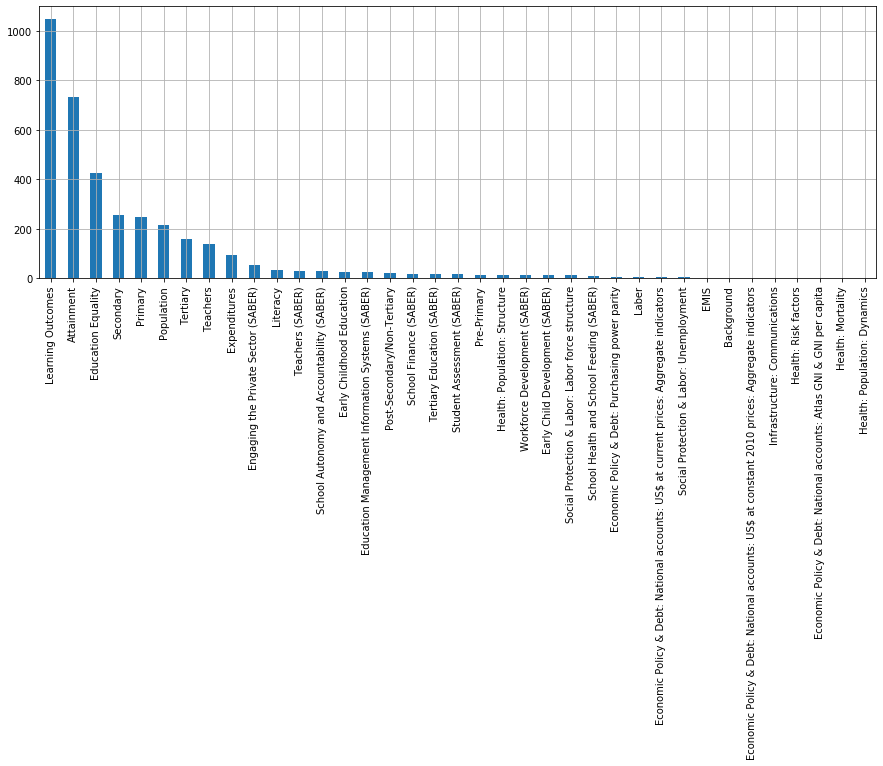

In [40]:
# Availiable indicator topics
df_series['Topic'].value_counts().plot.bar(figsize = (15,5), grid = True, rot = 90)
plt.show()

The dataset provides a wide variety of indicators in nearly 40 different topics. 

Among those, topics such as "Attainement", "Population", "Secondary" and "Tertiary" shall be a source of useful indicators to learn more about the targeted audience. 

Topics concerning infrastructures could give information about whether students could access our online training plateform.

Indicators about learning outcomes, literacy and student assesment could tell us more about the possible lacks in education, student abilities to use the internet, or their capabilities to take an online class in english.

In [41]:
# Joining datasets to import the indicator topic in the main dataframe
df_series['Series Code'] = df_series['Series Code'].apply(str.upper)
df_data_cleaned['Indicator Code'] = df_data_cleaned['Indicator Code'].apply(str.upper)

df_data_cleaned = df_data_cleaned.merge(df_series[['Series Code',"Topic"]], how='left', 
                                        left_on= 'Indicator Code',right_on = 'Series Code')

In [42]:
# Checking results of the join
df_data_cleaned['Topic'].value_counts(dropna = False)

Attainment                                                                                      110419
Population                                                                                       41648
Secondary                                                                                        39966
Primary                                                                                          35599
Education Equality                                                                               24318
Tertiary                                                                                         23100
Learning Outcomes                                                                                21986
Expenditures                                                                                     11983
Teachers                                                                                         10701
Literacy                                                                 

In [43]:
# Unfound indicator codes
df_data_cleaned[df_data_cleaned['Topic'].isnull()]['Indicator Code'].unique()

array(['SE.SEC.ENRR.UP.FE', 'UIS.OE.56.40510', 'SE.SEC.DURS.LO'],
      dtype=object)

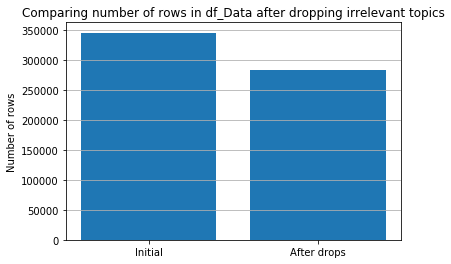

In [44]:
# Deleting entries with topics irrelevant for our analysis
irrelevant_topics = ['Primary', 'Expenditures', 'Engaging the Private Sector (SABER)','School Finance (SABER)', 
                     'School Autonomy and Accountability (SABER)', 'Early Childhood Education', 'Pre-Primary',
                     'Health: Population: Structure', 'Early Child Development (SABER)','Workforce Development (SABER)',
                     'Social Protection & Labor: Labor force structure', 'School Health and School Feeding (SABER)',
                     'Social Protection & Labor: Unemployment',
                     'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'EMIS',
                     'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
                     'Health: Risk factors', 'Health: Population: Dynamics', 'Health: Mortality', 'Background',
                     'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
                    ]

from P2_preprocession_scripts import drop_topics
test = drop_topics(df_data_cleaned, irrelevant_topics)

## First look on projected data

In [45]:
# Indicators with availiable data after 2017
df_data_cleaned['nb_projected'] = df_data_cleaned.loc[:,'2020':'2100'].count(axis = 1)
df_data_cleaned[df_data_cleaned['nb_projected'] > 0]

Country Name Country Code  \
8993          World          WLD   
8994          World          WLD   
8995          World          WLD   
8996          World          WLD   
8997          World          WLD   
8998          World          WLD   
8999          World          WLD   
9000          World          WLD   
9001          World          WLD   
9002          World          WLD   
9003          World          WLD   
9004          World          WLD   
9005          World          WLD   
9006          World          WLD   
9007          World          WLD   
9008          World          WLD   
9009          World          WLD   
9010          World          WLD   
9011          World          WLD   
9012          World          WLD   
9013          World          WLD   
9014          World          WLD   
9015          World          WLD   
9016          World          WLD   
9017          World          WLD   
9018          World          WLD   
9019          World          WLD   
9020          World          WLD   
9021          World          WLD   
9022          World          WLD   
...             ...          ...   
346162     Zimbabwe          ZWE   
346163     Zimbabwe          ZWE   
346164     Zimbabwe          ZWE   
346165     Zimbabwe          ZWE   
346166     Zimbabwe          ZWE   
346167     Zimbabwe          ZWE   
346168     Zimbabwe          ZWE   
346169     Zimbabwe          ZWE   
346170     Zimbabwe          ZWE   
346171     Zimbabwe          ZWE   
346172     Zimbabwe          ZWE   
346173     Zimbabwe          ZWE   
346174     Zimbabwe          ZWE   
346175     Zimbabwe          ZWE   
346176     Zimbabwe          ZWE   
346177     Zimbabwe          ZWE   
346178     Zimbabwe          ZWE   
346179     Zimbabwe          ZWE   
346180     Zimbabwe          ZWE   
346181     Zimbabwe          ZWE   
346182     Zimbabwe          ZWE   
346183     Zimbabwe          ZWE   
346184     Zimbabwe          ZWE   
346185     Zimbabwe          ZWE   
346186     Zimbabwe          ZWE   
346187     Zimbabwe          ZWE   
346188     Zimbabwe          ZWE   
346189     Zimbabwe          ZWE   
346190     Zimbabwe          ZWE   
346191     Zimbabwe          ZWE   

                                           Indicator Name  \
8993    Wittgenstein Projection: Mean years of schooli...   
8994    Wittgenstein Projection: Mean years of schooli...   
8995    Wittgenstein Projection: Mean years of schooli...   
8996    Wittgenstein Projection: Mean years of schooli...   
8997    Wittgenstein Projection: Mean Years of Schooli...   
8998    Wittgenstein Projection: Mean years of schooli...   
8999    Wittgenstein Projection: Mean years of schooli...   
9000    Wittgenstein Projection: Mean years of schooli...   
9001    Wittgenstein Projection: Mean years of schooli...   
9002    Wittgenstein Projection: Mean years of schooli...   
9003    Wittgenstein Projection: Mean years of schooli...   
9004    Wittgenstein Projection: Mean years of schooli...   
9005    Wittgenstein Projection: Mean years of schooli...   
9006    Wittgenstein Projection: Mean years of schooli...   
9007    Wittgenstein Projection: Mean years of schooli...   
9008    Wittgenstein Projection: Mean years of schooli...   
9009    Wittgenstein Projection: Mean years of schooli...   
9010    Wittgenstein Projection: Mean years of schooli...   
9011    Wittgenstein Projection: Mean years of schooli...   
9012    Wittgenstein Projection: Mean years of schooli...   
9013    Wittgenstein Projection: Mean Years of Schooli...   
9014    Wittgenstein Projection: Mean years of schooli...   
9015    Wittgenstein Projection: Mean years of schooli...   
9016    Wittgenstein Projection: Mean years of schooli...   
9017    Wittgenstein Projection: Mean years of schooli...   
9018    Wittgenstein Projection: Mean years of schooli...   
9019    Wittgenstein Projection: Mean years of schooli...   
9020    Wittgenstein Projection: Mean years of schooli...   
9021 

In [46]:
# Number of countries and indicators concerned by projected data
proj_countries = len(df_data_cleaned[df_data_cleaned['nb_projected'] > 0]['Country Code'].unique())
proj_indic = len(df_data_cleaned[df_data_cleaned['nb_projected'] > 0]['Indicator Code'].unique())

print("Projected data is availiable for {} countries / world zones on {} different indicators."
      .format(proj_countries, proj_indic))

Projected data is availiable for 167 countries / world zones on 308 different indicators.


In [47]:
# Number of countries for projected indicators
proj_mean = df_data_cleaned[df_data_cleaned['nb_projected'] > 0][['Indicator Code', 'nb_projected']].groupby('Indicator Code').count().mean()[0]
proj_std = df_data_cleaned[df_data_cleaned['nb_projected'] > 0][['Indicator Code', 'nb_projected']].groupby('Indicator Code').count().std()[0]
print("Mean number of countries per projected indicator : " + str(proj_mean) + " (standard deviation = " + str(proj_std) + ").")

proj_mean = df_data_cleaned[df_data_cleaned['nb_projected'] > 0][['Country Code', 'nb_projected']].groupby('Country Code').count().mean()[0]
proj_std = df_data_cleaned[df_data_cleaned['nb_projected'] > 0][['Country Code', 'nb_projected']].groupby('Country Code').count().std()[0]
print("Mean number of projected indicators per country : " + str(proj_mean) + " (standard deviation = " + str(proj_std) + ").")

Mean number of countries per projected indicator : 167.0 (standard deviation = 0.0).
Mean number of projected indicators per country : 308.0 (standard deviation = 0.0).


For all availiable projections in the dataset, each one of the 308 indicators is given for the same 167 countries.

In [48]:
# Subject of projected data
projected_data = df_data_cleaned[df_data_cleaned['nb_projected'] > 0].copy()
most_common_words(projected_data['Indicator Name'].unique(), 50)

('of', 506)
('Wittgenstein', 308)
('Projection:', 308)
('by', 270)
('highest', 270)
('level', 270)
('educational', 270)
('attainment.', 270)
('age', 234)
('Percentage', 198)
('the', 198)
('population', 198)
('Secondary.', 135)
('Female', 102)
('Male', 102)
('Total', 102)
('Primary.', 90)
('Population', 72)
('in', 72)
('thousands', 72)
('Incomplete', 45)
('Lower', 45)
('No', 45)
('Education.', 45)
('Post', 45)
('Upper', 45)
('Mean', 38)
('Age', 38)
('years', 36)
('schooling.', 36)
('15-19', 36)
('20-24', 36)
('25-29', 36)
('15+', 18)
('20-39', 18)
('20-64', 18)
('25+', 18)
('40-64', 18)
('60+', 18)
('80+', 18)
('total', 18)
('15+.', 4)
('25+.', 4)
('0-19.', 3)
('15-19.', 3)
('20-24.', 3)
('20-39.', 3)
('20-64.', 3)
('25-29.', 3)
('40-64.', 3)


In [49]:
# Names of projected series
projected_data['Indicator Name'] = projected_data['Indicator Name'].apply(lambda x : str.replace(x, "Wittgenstein Projection: ", ""))
projected_data['Indicator Name']

8993              Mean years of schooling. Age 0-19. Female
8994                Mean years of schooling. Age 0-19. Male
8995               Mean years of schooling. Age 0-19. Total
8996               Mean years of schooling. Age 15+. Female
8997           Mean Years of Schooling. Age 15+. Gender Gap
8998                 Mean years of schooling. Age 15+. Male
8999                Mean years of schooling. Age 15+. Total
9000             Mean years of schooling. Age 15-19. Female
9001               Mean years of schooling. Age 15-19. Male
9002              Mean years of schooling. Age 15-19. Total
9003             Mean years of schooling. Age 20-24. Female
9004               Mean years of schooling. Age 20-24. Male
9005              Mean years of schooling. Age 20-24. Total
9006             Mean years of schooling. Age 20-39. Female
9007               Mean years of schooling. Age 20-39. Male
9008              Mean years of schooling. Age 20-39. Total
9009             Mean years of schooling

In [50]:
# Number of indicators relative to the mean years of schooling
len(projected_data[projected_data['Indicator Name'].str.contains('Mean years of schooling')]['Indicator Name'].unique())

36

In [51]:
# Number of indicators relative to the highest level of eduction
len(projected_data[projected_data['Indicator Name'].str.contains(' by highest level of educational attainment')]['Indicator Name'].unique())

270

In [52]:
# Countries with no projection
countries_with_proj = projected_data['Country Name'].unique()
all_countries = df_data_cleaned['Country Name'].unique()

[country for country in all_countries if country not in countries_with_proj]

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'Afghanistan',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Barbados',
 'Bermuda',
 'Botswana',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'Djibouti',
 'Dominica',
 'Eritrea',
 'Faroe Islands',
 'Fiji',
 'Gibraltar',
 '

The only availiable projections in the dataset only concerns two topics : years of schooling and educationnal level of the population. Some relevant indicators could be found in those, such as population expected to have at least an upper secondary educational level.

Notice that projections are not availiable for geographical zones and other countries groups. Most of the missing countries are sparsely populated countries (examples : Andorra, Monaco, Nauru, Solomon islands) or overseas territories (Greenland, Virgin Islands, Faroe Islands). But some densely populated countries will remain missing such as Uzbekistan, Afghanistan, Botswana, Mauritania or Oman.

# Searching relevant indicators

In [53]:
# First look on common words in indicator names
most_common_words(df_data_cleaned['Indicator Name'], 50)

('of', 258454)
('age', 122523)
('in', 105371)
('Percentage', 104485)
('female', 96264)
('(%)', 93418)
('population', 73066)
('primary', 59794)
('secondary', 58972)
('by', 56604)
('education,', 56477)
('level', 54462)
('Barro-Lee:', 51840)
('the', 51623)
('Wittgenstein', 51436)
('Projection:', 51436)
('male', 47468)
('educational', 46491)
('attainment.', 45357)
('highest', 45090)
('education', 44395)
('both', 43858)
('sexes', 43858)
('with', 39330)
('(number)', 38826)
('Population,', 37428)
('total', 37036)
('Total', 36697)
('tertiary', 34732)
('lower', 33904)
('schooling.', 33274)
('Grade', 30380)
('Completed', 25920)
('years', 25918)
('Secondary.', 25157)
('Male', 24823)
('Female', 24822)
('Population', 23672)
('students', 23421)
('and', 23010)
('ages', 21484)
('rate,', 21207)
('UIS:', 20373)
('Primary.', 19610)
('Average', 19214)
('enrolment', 17981)
('rate', 17306)
('schooling,', 17280)
('from', 17227)
('Enrolment', 17144)


## Access to a computer / access to the Internet

In [54]:
# Looking for indicators about computer access
computer = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("computer")][['Indicator Code', 'Indicator Name']]
computer.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
PIAAC: Adults by proficiency level in problem s...              30
PIAAC: Adults by proficiency level in problem s...              30
PIAAC: Female adults by proficiency level in pr...              26
PIAAC: Male adults by proficiency level in prob...              26
PIAAC: Young adults by proficiency level in pro...              30
PIAAC: Young adults by proficiency level in pro...              29
Personal computers (per 100 people)                            214

Indicator : Personal computers (per 100 people)
Indicator code : IT.CMP.PCMP.P2


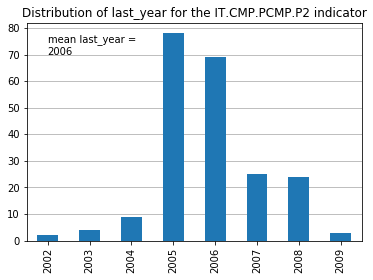

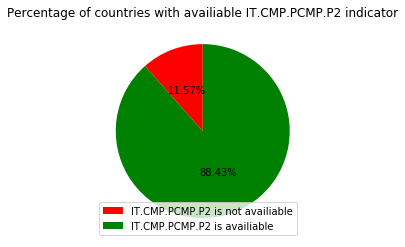

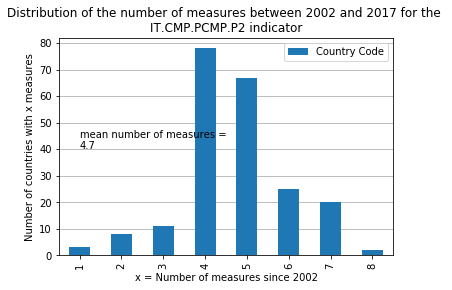

In [55]:
# Average last mesure and country availiability
from P2_preprocession_scripts import plot_indicator_distrib
plot_indicator_distrib(df_data_cleaned, "Personal computers (per 100 people)")

Among availiable indicators to measure the access to a computer, the IT.CMP.PCMP.P2 serie looks like a very relevant indicator to choose. Its value is very easy to construe, and this indicator is availiable for a large majority of countries.

It is important to notice that the availiable data on this serie is quite old (most of the data between 2005 and 2008). However, it should give an interesting base value.

In [56]:
# Looking for indicators about computer access
internet = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("Internet")][['Indicator Code', 'Indicator Name']]
internet.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                 
Internet users (per 100 people)             230

Indicator : Internet users (per 100 people)
Indicator code : IT.NET.USER.P2


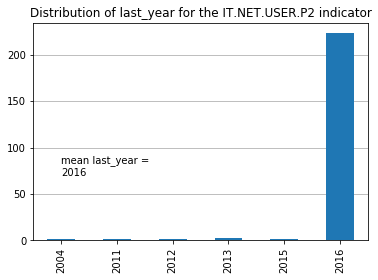

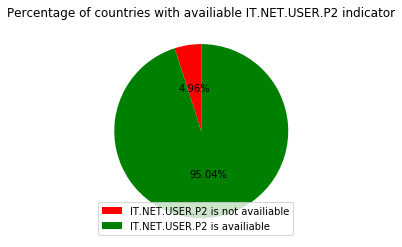

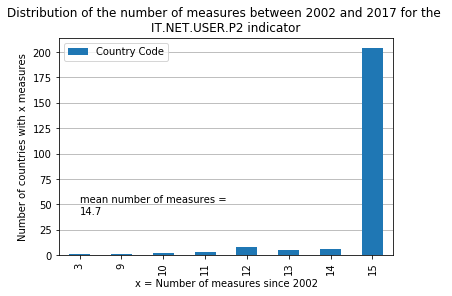

In [57]:
# Average last mesure and country availiability
plot_indicator_distrib(df_data_cleaned, "Internet users (per 100 people)")

The IT.NET.USER.P2 is a much interesting indicator : the measure is still easy to understand, more relevant for knowing if students could access our learning platform, a vast majority of data is only 3 years old, and the measures are availiable for 95% of the countries.

## Student in secondary education

Our target audience is students with an academic level equivalent to french lyceum and university. Lot of indicators are sub-divided in male & female indicators, so we'll focus on series concerning both sexes.

In the International Standard Classification of Education, French Lyceum corresponds to "upper secondary" level (source : https://en.wikipedia.org/wiki/Lyceum#France), the analysis shall then be restricted to that education level.

In [58]:
# Looking for indicators about number of students in secondary
secondary = df_data_cleaned[
    df_data_cleaned['Indicator Name'].str.contains("upper secondary")
    & df_data_cleaned['Indicator Name'].str.contains("both sexes")
    ][['Indicator Code', 'Indicator Name']]

secondary.groupby(['Indicator Name']).count().sort_values(by=['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
Enrolment in upper secondary general, both sexe...             226
Enrolment in upper secondary education, both se...             225
Population of the official age for upper second...             223
Percentage of students in upper secondary educa...             220
Gross enrolment ratio, upper secondary, both se...             217
Enrolment in upper secondary education, public ...             194
Enrolment in upper secondary vocational, both s...             193
Percentage of students in upper secondary educa...             193
Enrolment in upper secondary education, private...             187
Rate of out-of-school youth of upper secondary ...             184
Out-of-school youth of upper secondary school a...             184
Teachers in upper secondary education, both sex...             179
Net enrolment rate, upper secondary, both sexes...             153
Adjusted net enrolment rate, upper secondary, b...             153
Percentage of teachers in upper secondary educa...              96
Percentage of teachers in upper secondary educa...              38
Africa Dataset: Graduates from accredited pre-s...              18
Africa Dataset: Percentage of newly recruited t...              17
Africa Dataset: Percentage of teachers in upper...               7
Africa Dataset: Ratio of teacher training gradu...               6
Africa Dataset: Teacher attrition rate from pub...               1

Indicator : Enrolment in upper secondary education, both sexes (number)
Indicator code : UIS.E.3


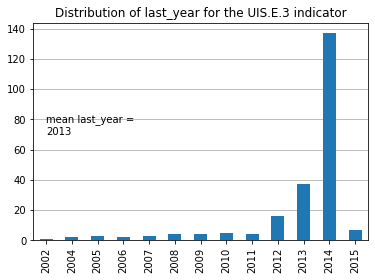

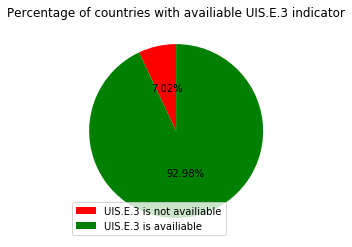

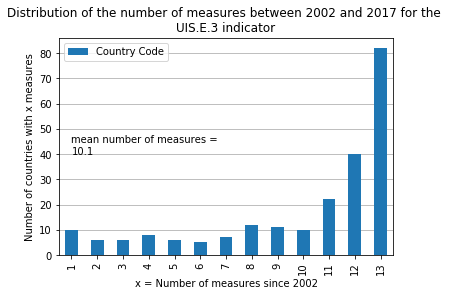

In [59]:
# Average last mesure and country availiability
plot_indicator_distrib(df_data_cleaned, "Enrolment in upper secondary education, both sexes (number)")

Indicator : Gross enrolment ratio, upper secondary, both sexes (%)
Indicator code : SE.SEC.ENRR.UP


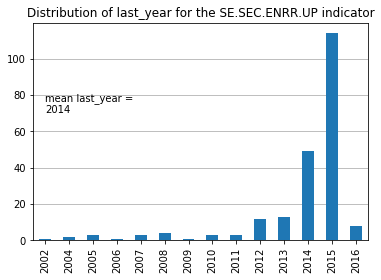

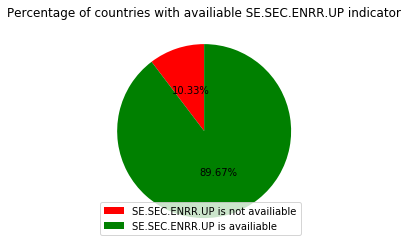

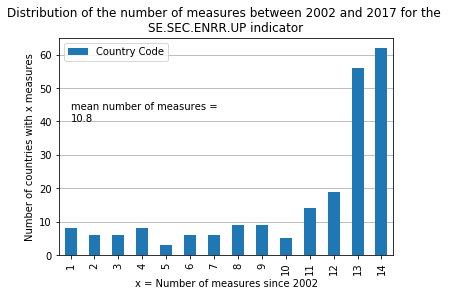

In [60]:
# Data availiabilty on gross enrolment in upper secondary
plot_indicator_distrib(df_data_cleaned, "Gross enrolment ratio, upper secondary, both sexes (%)")

## Number of student in tertiary (number / percentage)

In [61]:
# Looking for indicators about number of students in secondary
tertiary = df_data_cleaned[
    df_data_cleaned['Indicator Name'].str.contains("tertiary")
    & df_data_cleaned['Indicator Name'].str.contains("both sexes")
    ][['Indicator Code', 'Indicator Name']]

tertiary.groupby(['Indicator Name']).count().sort_values(by=['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
Population of the official age for tertiary edu...             223
Total outbound internationally mobile tertiary ...             222
Enrolment in tertiary education, all programmes...             215
School life expectancy, tertiary, both sexes (y...             206
Gross enrolment ratio, tertiary, both sexes (%)                206
Gross enrolment ratio, primary to tertiary, bot...             203
School life expectancy, primary to tertiary, bo...             202
Teachers in tertiary education programmes, both...             200
Population of the official age for post-seconda...             193
Enrolment in tertiary education per 100,000 inh...             181
Enrolment in tertiary education, ISCED 5 progra...             181
Percentage of all students in tertiary educatio...             181
Enrolment in tertiary education, ISCED 8 progra...             169
Percentage of all students in tertiary educatio...             168
Graduates from tertiary education, both sexes (...             165
Enrolment in post-secondary non-tertiary educat...             161
Percentage of students in tertiary education en...             149
Percentage of students in tertiary education en...             147
Percentage of students in tertiary education en...             147
Percentage of students in tertiary education en...             146
Percentage of students in tertiary education en...             145
Enrolment in tertiary education, ISCED 6 progra...             143
Percentage of all students in tertiary educatio...             143
Percentage of students in tertiary education en...             142
Percentage of all students in tertiary educatio...             141
Enrolment in tertiary education, ISCED 7 progra...             141
Percentage of graduates from tertiary education...             139
Graduates from ISCED 5 programmes in tertiary e...             139
Percentage of graduates from tertiary education...             138
Percentage of students in tertiary education en...             137
Gross graduation ratio from first degree progra...             137
Percentage of students in tertiary education en...             136
Enrolment in post-secondary non-tertiary educat...             134
Percentage of graduates from tertiary education...             132
Percentage of graduates from tertiary education...             131
School life expectancy, post-secondary non-tert...             130
Percentage of graduates from tertiary education...             130
Percentage of graduates from tertiary education...             130
Percentage of graduates from tertiary education...             129
Percentage of graduates from tertiary education...             129
Percentage of graduates from tertiary education...             129
Gross enrolment ratio, post-secondary non-terti...             127
Percentage of students in tertiary education en...             124
Percentage of students in post-secondary non-te...             123
Enrolment in post-secondary non-tertiary educat...             122
Graduates from ISCED 8 programmes in tertiary e...             118
Teachers in tertiary education ISCED 5 programm...             104
Graduates from ISCED 6 programmes in tertiary e...             100
Graduates from ISCED 7 programmes in tertiary e...              98
Teachers in post-secondary non-tertiary educati...              89
Percentage of students in post-secondary non-te...              65
Percentage of teachers in post-secondary non-te...              43

Indicator : Population of the official age for tertiary education, both sexes (number)
Indicator code : SP.TER.TOTL.IN


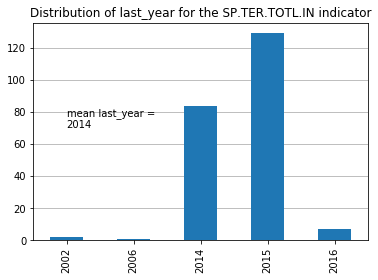

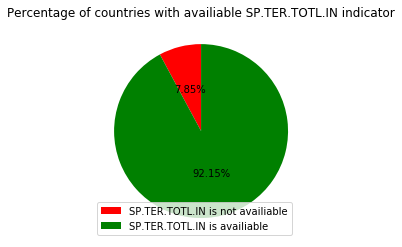

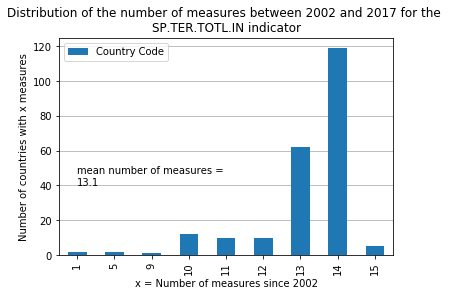

In [62]:
# data availiability on population in tertiary education
plot_indicator_distrib(df_data_cleaned, "Population of the official age for tertiary education, both sexes (number)")

Indicator : Gross enrolment ratio, tertiary, both sexes (%)
Indicator code : SE.TER.ENRR


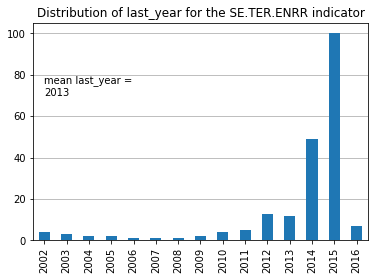

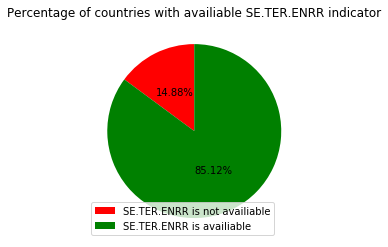

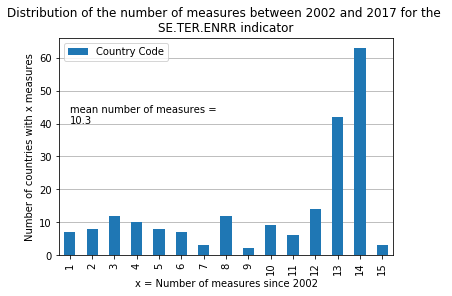

In [63]:
# data availiabilty on gross enrolment in tertiary
plot_indicator_distrib(df_data_cleaned, "Gross enrolment ratio, tertiary, both sexes (%)")

Indicator : Enrolment in tertiary education, all programmes, both sexes (number)
Indicator code : SE.TER.ENRL


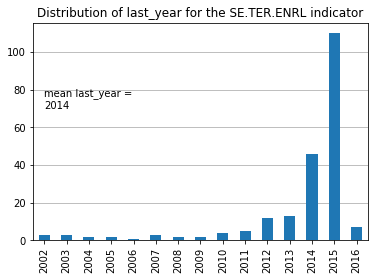

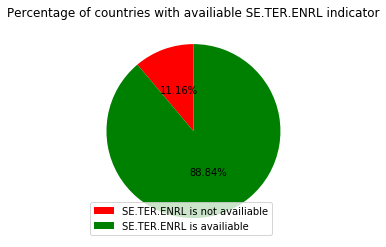

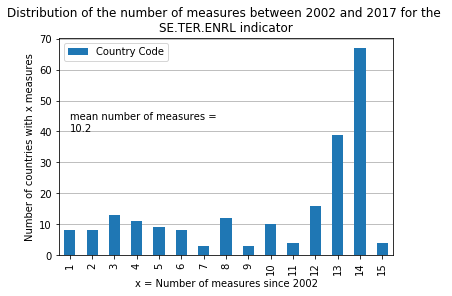

In [64]:
# data availiabilty on global enrolment in tertiary
plot_indicator_distrib(df_data_cleaned, "Enrolment in tertiary education, all programmes, both sexes (number)")

## Projection of student population growth

In [65]:
# Projection on number of students in upper secondary
projection = df_data_cleaned[
    df_data_cleaned['Indicator Name'].str.contains("Projection") 
    & df_data_cleaned['Indicator Name'].str.contains("Upper Secondary. Total")][['Indicator Code', 'Indicator Name']]

projection.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the tota...             167
Wittgenstein Projection: Population age 15-19 i...             167
Wittgenstein Projection: Population age 20-24 i...             167
Wittgenstein Projection: Population age 25-29 i...             167
Wittgenstein Projection: Population in thousand...             167

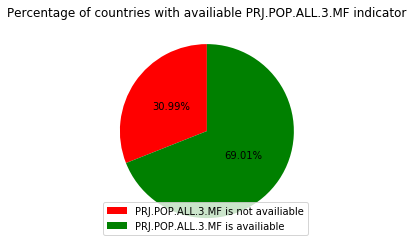

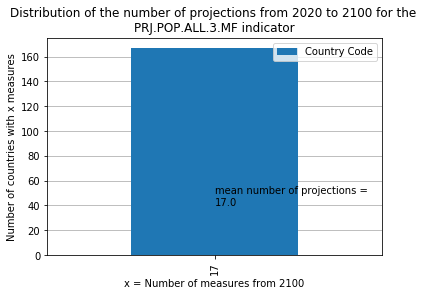

In [66]:
# Data availiability on projected student with upper secondary education
from P2_preprocession_scripts import plot_projections
plot_projections(df_data_cleaned, 
                 "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total")

In [67]:
# Projection on number of students in post secondary
projection = df_data_cleaned[
    df_data_cleaned['Indicator Name'].str.contains("Projection") 
    & df_data_cleaned['Indicator Name'].str.contains("Post Secondary. Total")][['Indicator Code', 'Indicator Name']]

projection.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the popu...             167
Wittgenstein Projection: Percentage of the tota...             167
Wittgenstein Projection: Population age 15-19 i...             167
Wittgenstein Projection: Population age 20-24 i...             167
Wittgenstein Projection: Population age 25-29 i...             167
Wittgenstein Projection: Population in thousand...             167

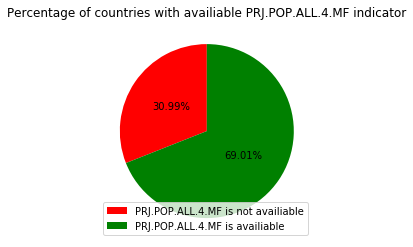

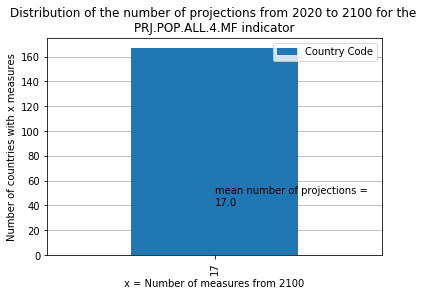

In [68]:
# Data availiability on projected student with post secondary education
plot_projections(df_data_cleaned, 
                 "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total")

## Students not attending school in secondary or tertiary level

In [69]:
# Indicator on unattendance
oos_upper = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("out-of-school")
                           & df_data_cleaned['Indicator Name'].str.contains("upper secondary")
                           ][['Indicator Code', 'Indicator Name']]
oos_upper.groupby(['Indicator Name']).count().sort_values(by = ['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
Rate of out-of-school youth of upper secondary ...             184
Rate of out-of-school youth of upper secondary ...             181
Rate of out-of-school youth of upper secondary ...             181

Indicator : Rate of out-of-school youth of upper secondary school age, both sexes (%)
Indicator code : UIS.ROFST.3.CP


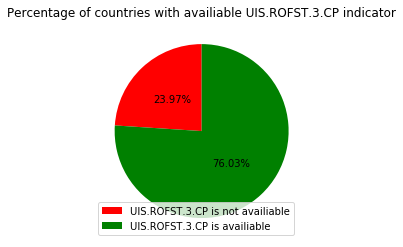

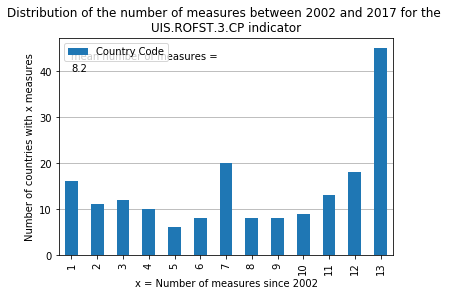

In [70]:
# Data availiability on out-of-school students in upper secondary
plot_indicator_distrib(df_data_cleaned, "Rate of out-of-school youth of upper secondary school age, both sexes (%)")

## Part of student leaving school in secondary and tertiary / with no degree

In [71]:
# Indicators on graduation ratio
graduation = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("graduation ratio")
                            & df_data_cleaned['Indicator Name'].str.contains("both")
                           ][['Indicator Code', 'Indicator Name']]
graduation.groupby(['Indicator Name']).count().sort_values(by = ['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
Gross graduation ratio from primary education, ...             165
Gross graduation ratio from lower secondary edu...             145
Gross graduation ratio from first degree progra...             137

In [72]:
# Definition of the gross graduation ratio
df_series[df_series['Series Code'] == "UIS.GGR.2"]['Long definition'].iloc[0]

'Number of graduates regardless of age in all lower secondary education programmes expressed as a percentage of the population at the theoretical graduation age for lower secondary education. The ratio can exceed 100% due to over-aged and under-aged adolescents who enter lower secondary school for the first time early or late and/or repeat grades.'

In [73]:
# Indicators on completed upper education
graduation = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("completed upper")
                            & df_data_cleaned['Indicator Name'].str.contains("Total")
                           ][['Indicator Code', 'Indicator Name']]
graduation.groupby(['Indicator Name']).count().sort_values(by = ['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
UIS: Percentage of population age 25+ with at l...             141
UIS: Percentage of population age 25+ with comp...             134

Indicator : UIS: Percentage of population age 25+ with completed upper secondary education. Total
Indicator code : UIS.EA.3.AG25T99


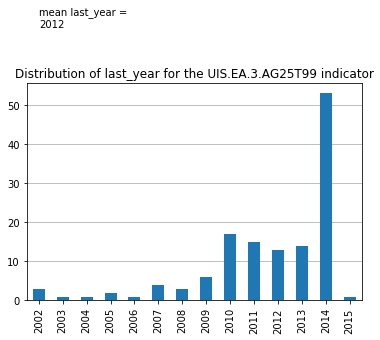

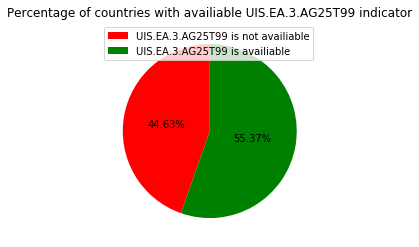

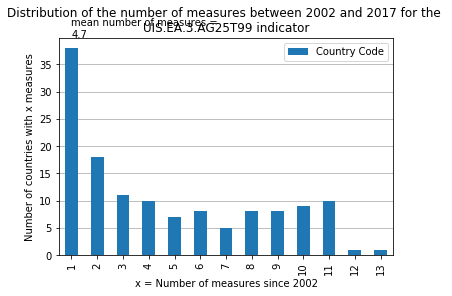

In [74]:
# Data availiability on completed upper education
plot_indicator_distrib(df_data_cleaned, 
                       "UIS: Percentage of population age 25+ with completed upper secondary education. Total")

In [75]:
# Indicators on completed tertiary
graduation = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("completed")
                            & df_data_cleaned['Indicator Name'].str.contains("Total")
                           ][['Indicator Code', 'Indicator Name']]
graduation.groupby(['Indicator Name']).count().sort_values(by = ['Indicator Code'], ascending = False)

Indicator Code
Indicator Name                                                    
UIS: Percentage of population age 25+ with at l...             141
UIS: Percentage of population age 25+ with at l...             140
UIS: Percentage of population age 25+ with at l...             140
UIS: Percentage of population age 25+ with comp...             134
UIS: Percentage of population age 25+ with a co...             132
UIS: Percentage of population age 25+ with at l...             131
UIS: Percentage of population age 25+ with comp...             130
UIS: Percentage of population age 25+ with comp...             128
UIS: Percentage of population age 25+ with at l...             123
UIS: Percentage of population age 25+ with comp...              96
UIS: Percentage of population age 25+ with at l...              91
UIS: Percentage of population age 25+ with at l...              83
UIS: Percentage of population age 25+ with a co...              72
UIS: Percentage of population age 25+ with a co...              72

Indicator : UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total
Indicator code : UIS.EA.4T6.AG25T99


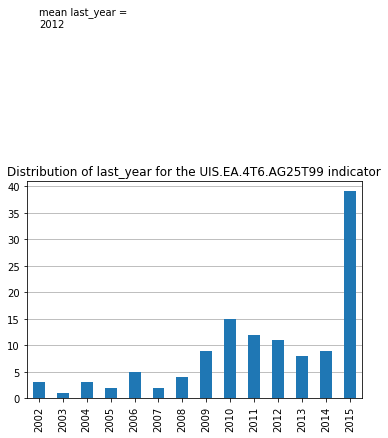

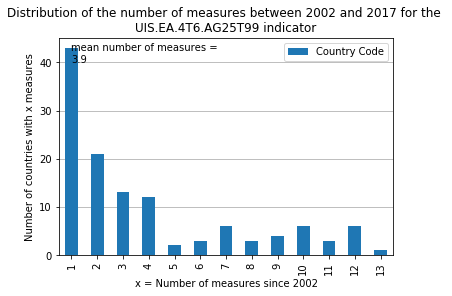

In [76]:
# Data availiability on completed post secondary education
plot_indicator_distrib(df_data_cleaned, 
                       "UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total")

Data on completed education are availiable and detailed for every ISCED education level, but only concerns half of the countries in the dataset. These series could be relevant for further investigation on specific countries, but not really for comparing countries on a global scale.

## Level capacity in English / French

In [77]:
# Indicators on english capabilities
english = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("English", "english")][['Indicator Code', 'Indicator Name']]
english.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
EGRA: Correct Isolated Words Read Per Minute (M...               2
EGRA: Correct Isolated Words Read Per Minute (M...               2
EGRA: Correct Isolated Words Read Per Minute (M...               1
EGRA: Correct Isolated Words Read Per Minute (M...               1
EGRA: Correct Letter Names Read Per Minute (Mea...               3
EGRA: Correct Letter Names Read Per Minute (Mea...               1
EGRA: Correct Letter Names Read Per Minute (Mea...               1
EGRA: Correct Letter Sounds Read Per Minute (Me...               2
EGRA: Correct Letter Sounds Read Per Minute (Me...               2
EGRA: Correct Letter Sounds Read Per Minute (Me...               1
EGRA: Correct Letter Sounds Read Per Minute (Me...               1
EGRA: Correct Non-Words Read Per Minute (Mean)....               2
EGRA: Correct Non-Words Read Per Minute (Mean)....               2
EGRA: Correct Non-Words Read Per Minute (Mean)....               1
EGRA: Correct Non-Words Read Per Minute (Mean)....               1
EGRA: Identification of the Initial Sound of a ...               2
EGRA: Identification of the Initial Sound of a ...               2
EGRA: Identification of the Initial Sound of a ...               2
EGRA: Identification of the Initial Sound of a ...               1
EGRA: Listening Comprehension - Share of studen...               3
EGRA: Listening Comprehension - Share of studen...               2
EGRA: Listening Comprehension - Share of studen...               2
EGRA: Listening Comprehension - Share of studen...               1
EGRA: Oral Reading Fluency - Correct Words Read...               3
EGRA: Oral Reading Fluency - Correct Words Read...               2
EGRA: Oral Reading Fluency - Correct Words Read...               1
EGRA: Oral Reading Fluency - Correct Words Read...               1
EGRA: Oral Reading Fluency - Share of students ...               3
EGRA: Oral Reading Fluency - Share of students ...               2
EGRA: Oral Reading Fluency - Share of students ...               1
EGRA: Oral Reading Fluency - Share of students ...               1
EGRA: Reading Comprehension - Share of students...               3
EGRA: Reading Comprehension - Share of students...               2
EGRA: Reading Comprehension - Share of students...               1
EGRA: Reading Comprehension - Share of students...               1
EGRA: Reading Comprehension - Share of students...               3
EGRA: Reading Comprehension - Share of students...               2
EGRA: Reading Comprehension - Share of students...               1
EGRA: Reading Comprehension - Share of students...               1

In [78]:
# Indicators on french capabilities
french = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("French", "french")][['Indicator Code', 'Indicator Name']]
french.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
EGRA: Correct Letter Names Read Per Minute (Mea...               1
EGRA: Correct Non-Words Read Per Minute (Mean)....               1
EGRA: Oral Reading Fluency - Correct Words Read...               1
EGRA: Oral Reading Fluency - Share of students ...               1
EGRA: Reading Comprehension - Share of students...               1
EGRA: Reading Comprehension - Share of students...               1
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Distribution of 5th Grade French Scores:...              10
PASEC: Mean performance on the French language ...              13
PASEC: Mean performance on the French language ...              13
PASEC: Mean performance on the French language ...              13

In [79]:
# Indicators on language capabilities
language = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains("language", "Language")][['Indicator Code', 'Indicator Name']]
language.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
PASEC: 2nd grade students by language proficien...              10
PASEC: 2nd grade students by language proficien...              10
PASEC: 2nd grade students by language proficien...              10
PASEC: 2nd grade students by language proficien...              10
PASEC: 2nd grade students by language proficien...              10
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students above the Knowledge B...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: 5th grade students at the lowest level o...              13
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Distribution of 2nd grade language score...              10
PASEC: Mean performance on the French language ...              13
PASEC: Mean performance on the French language ...              13
PASEC: Mean performance on the French language ...              13
PASEC: Mean performance on the language scale f...              10
PASEC: Mean performance on the language scale f...              10
PASEC: Mean performance on the language scale f...              10
PASEC: Mean performance on the language scale f...              10
PASEC: Mean performance on the language scale f...              10

Some indicators related to performance in learning a language are present, but there are way to few data in our cleaned dataset to compare countries on a global scale.

## Pupil - teacher ratio

In [80]:
# Indicators on the number of students per teacher
df_pupil = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains('Pupil-teacher ratio')][['Indicator Code', 'Indicator Name']]
df_pupil.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
Pupil-teacher ratio in lower secondary educatio...             189
Pupil-teacher ratio in pre-primary education (h...             204
Pupil-teacher ratio in primary education (headc...             221
Pupil-teacher ratio in secondary education (hea...             208
Pupil-teacher ratio in tertiary education (head...             173
Pupil-teacher ratio in upper secondary educatio...             184

Indicator : Pupil-teacher ratio in upper secondary education (headcount basis)
Indicator code : UIS.PTRHC.3


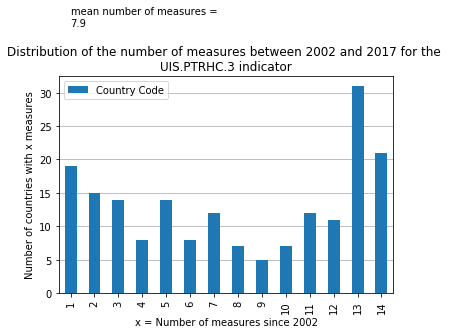

In [81]:
# Data availiability on pupil-teacher ratio in upper secondary
plot_indicator_distrib(df_data_cleaned,"Pupil-teacher ratio in upper secondary education (headcount basis)")

Indicator : Pupil-teacher ratio in tertiary education (headcount basis)
Indicator code : UIS.PTRHC.56


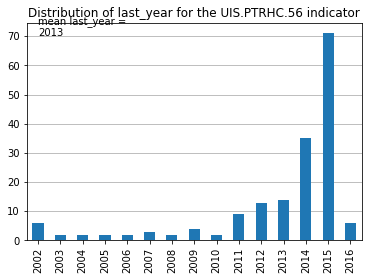

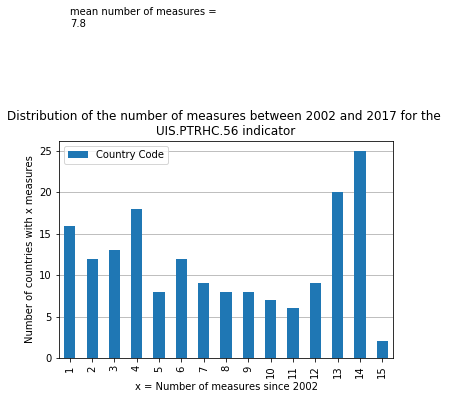

In [82]:
# Data availiability on pupil-teacher ratio in tertiary
plot_indicator_distrib(df_data_cleaned,"Pupil-teacher ratio in tertiary education (headcount basis)")

## GPD

In [83]:
# Searching for indicator relative to the income level
df_GDP = df_data_cleaned[df_data_cleaned['Indicator Name'].str.contains('GDP')][['Indicator Code', 'Indicator Name']]
df_GDP.groupby(['Indicator Name']).count()

Indicator Code
Indicator Name                                                    
GDP at market prices (constant 2005 US$)                       227
GDP at market prices (current US$)                             232
GDP per capita (constant 2005 US$)                             227
GDP per capita (current US$)                                   232
GDP per capita, PPP (constant 2011 internationa...             217
GDP per capita, PPP (current international $)                  217
GDP, PPP (constant 2011 international $)                       217
GDP, PPP (current international $)                             217
Government expenditure in educational instituti...             160
Government expenditure in post-secondary non-te...              98
Government expenditure in pre-primary instituti...             137
Government expenditure in primary institutions ...             156
Government expenditure in secondary institution...             162
Government expenditure in tertiary institutions...             158
Government expenditure on education as % of GDP...             181
Government expenditure on post-secondary non-te...             105
Government expenditure on pre-primary education...             143
Government expenditure on primary education as ...             159
Government expenditure on secondary and post-se...              48
Government expenditure on secondary education a...             164
Government expenditure on tertiary education as...             164
Government expenditure per lower secondary stud...             125
Government expenditure per post-secondary non-t...              78
Government expenditure per primary student as %...             161
Government expenditure per secondary student as...             157
Government expenditure per tertiary student as ...             155
Government expenditure per upper secondary stud...             127

Indicator : GDP per capita (constant 2005 US$)
Indicator code : NY.GDP.PCAP.KD


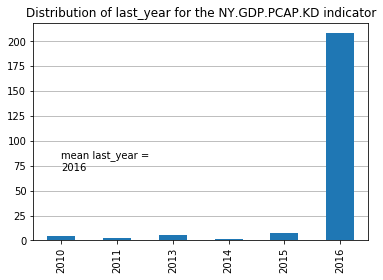

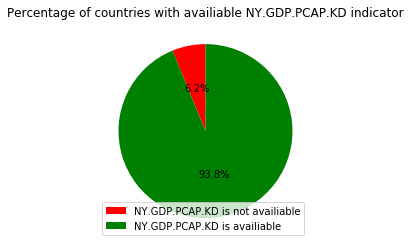

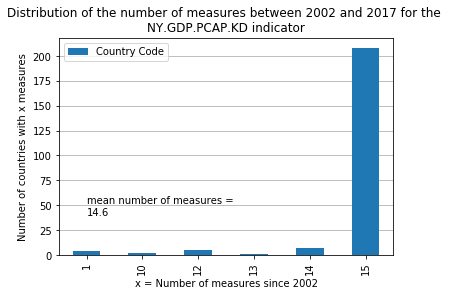

In [84]:
# Data availiability on GDP per capita
plot_indicator_distrib(df_data_cleaned,"GDP per capita (constant 2005 US$)")

Indicator : GDP per capita, PPP (constant 2011 international $)
Indicator code : NY.GDP.PCAP.PP.KD


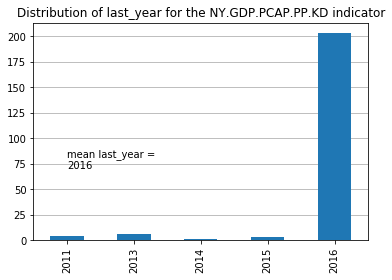

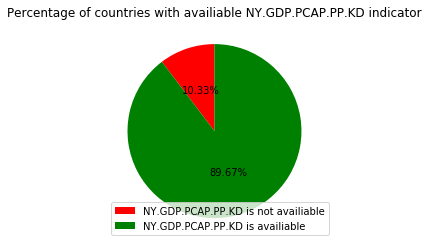

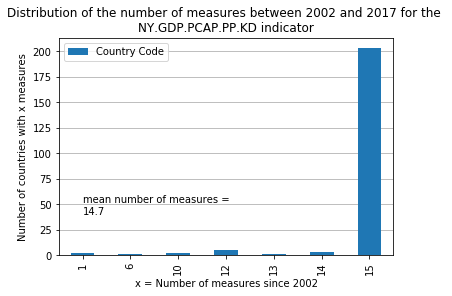

In [85]:
# Data availiability on GDP per capita (PPP)
plot_indicator_distrib(df_data_cleaned,"GDP per capita, PPP (constant 2011 international $)")

# Creation of a narrow dataset

## Selecting indicators

In [86]:
# List of indicator to select
indicators_selection = [
    'IT.NET.USER.P2', #  Internet access
    'UIS.E.3', # Number of students in upper secondary
    'SE.SEC.ENRR.UP', # Enrolment rate in upper secondary
    'SP.TER.TOTL.IN', # Population in age for tertiary
    'SE.TER.ENRR', # Enrolment rate in tertiary
    'SE.TER.ENRL', # Number of students in tertiary
    'PRJ.POP.ALL.3.MF', # Projected number of students in secondary
    'PRJ.POP.ALL.4.MF', # Projected number of students in tertiary
    'UIS.EA.3.AG25T99', # Completion rate in upper secondary
    'UIS.EA.4T6.AG25T99', # Completion rate in post secondary
    'UIS.PTRHC.3', # Pupil-teacher ratio in upper secondary
    'UIS.PTRHC.56', # Pupil - teacher ratio in tertiary
    'NY.GDP.PCAP.PP.KD' # GDP per capita (purchasing power parity)
]

In [87]:
# Checking indicators
all_indicators = df_data_cleaned['Indicator Code'].unique()
[indic for indic in indicators_selection if indic not in all_indicators]

[]

## Creation of the dataframe

In [88]:
# Creation of the selection dataframe and checking
df_selection = pd.DataFrame()

for indic in indicators_selection:
    df_selection = df_selection.append(df_data_cleaned[df_data_cleaned['Indicator Code'] == indic])
    
[indic for indic in indicators_selection if indic not in df_selection['Indicator Code'].unique()]

[]

## Adding useful informations

In [89]:
# Adding country geographic region and income group
df_selection = df_selection.merge(df_countries[['Country Code','Region', 'Income Group']], how='left',
                                  left_on= 'Country Code',right_on = 'Country Code')

In [90]:
# Adding indicator definition and unit of measure
df_selection = df_selection.merge(df_series[['Series Code','Short definition','Long definition', 'Unit of measure']], 
                                  how='left',left_on= 'Indicator Code',right_on = 'Series Code')

In [91]:
# Checking new columns fill rate
df_selection.count() / df_selection.shape[0]

Country Name        1.000000
Country Code        1.000000
Indicator Name      1.000000
Indicator Code      1.000000
2002                0.625554
2003                0.614268
2004                0.638452
2005                0.635228
2006                0.638049
2007                0.646110
2008                0.653769
2009                0.661830
2010                0.799678
2011                0.669891
2012                0.654575
2013                0.626763
2014                0.622330
2015                0.578799
2016                0.188634
2017                0.000000
2020                0.134623
2025                0.134623
2030                0.134623
2035                0.134623
2040                0.134623
2045                0.134623
2050                0.134623
2055                0.134623
2060                0.134623
2065                0.134623
2070                0.134623
2075                0.134623
2080                0.134623
2085                0.134623
2090          

In [92]:
# Entries with no regions
df_selection[df_selection['Region'].isna()]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Gibraltar', 'Nauru',
       'British Virgin Islands'], dtype=object)

In [93]:
# Filling missing regions

df_gibraltar = df_selection[df_selection['Country Name'] == 'Gibraltar'].copy()
df_gibraltar['Region'] = 'Europe & Central Asia'

df_nauru = df_selection[df_selection['Country Name'] == 'Nauru'].copy()
df_nauru['Region'] = 'East Asia & Pacific'

df_virgin = df_selection[df_selection['Country Name'] == 'British Virgin Islands'].copy()
df_virgin['Region'] = 'Latin America & Caribbean'

df_selection = df_selection[(df_selection['Country Name'] != 'Gibraltar') 
             & (df_selection['Country Name'] != 'Nauru')
             & (df_selection['Country Name'] != 'British Virgin Islands')
            ].append([df_gibraltar, df_nauru, df_virgin])

In [94]:
# Dropping useless columns
df_selection = df_selection.drop(['2017', 'Series Code_x', 'Series Code_y', 'Short definition', 'Unit of measure'], axis=1)

## Saving the new dataset

In [95]:
# Saving selected data in a new csv file
df_selection.to_csv("selected_data.csv", sep = ";" ,index=False)